In [93]:
import cv2
import numpy as np
import pandas as pd
from skimage.io import imread, imshow
import keras.layers as layers
import tensorflow as tf
import random
import keras
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

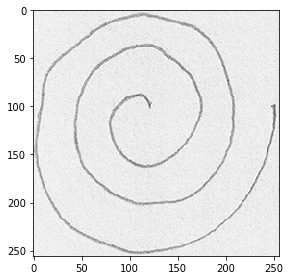

In [94]:
#Taking the input for training the Neural Network
IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_CHANNELS = 1
X_train = np.zeros((69, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros(69, dtype=np.uint8)
for i in range(1,37):
    im = imread('D:/Spandita/2_Final_Year_Project/DataSet/spiral/training/parkinson/P ({}).png'.format(i))
    X_train[i-1,:,:,0] = im[:,:,0]
    Y_train[i-1] = 1
for i in range(1,34):
    im = imread('D:/Spandita/2_Final_Year_Project/DataSet/spiral/training/healthy/H ({}).png'.format(i))
    X_train[i+36-1,:,:,0] = im[:,:,0]    
imshow(X_train[54,:,:,0])
#Y_train

In [95]:
#Shuffling the input arrays
shuffler = np.random.permutation(len(X_train))
X_train = X_train[shuffler]
Y_train = Y_train[shuffler]
X_train = X_train.astype("float32") / 255

In [96]:
num_classes = 2
input_shape = (256, 256, 1)

In [97]:
#Defining the model(CNN)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(2, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(4, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(6, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(8, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)), 
        layers.Conv2D(10, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(12, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.4),
        layers.Dense(12, activation="relu"),
        layers.Dropout(0.4),
        layers.Dense(1, activation="sigmoid"),        
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 2)       20        
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 2)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 4)       76        
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 4)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 6)         222       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 6)       

In [99]:
#Augmenting Training DataSet
data_generator = ImageDataGenerator(
        rotation_range=20,
        horizontal_flip=True,
        width_shift_range=0.02,
        height_shift_range=0.02,
)
data_generator.fit(X_train)

In [104]:
#Training the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit_generator(data_generator.flow(X_train, Y_train), epochs=100)

Epoch 1/100


C:\Users\Spandita\AppData\Local\Temp\ipykernel_5692\2040119976.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(data_generator.flow(X_train, Y_train), epochs=100)


3/3 [==============================] - 1s 342ms/step - loss: 0.5222 - accuracy: 0.7826
Epoch 2/100
3/3 [==============================] - 1s 169ms/step - loss: 0.4778 - accuracy: 0.7826
Epoch 3/100
3/3 [==============================] - 1s 166ms/step - loss: 0.5675 - accuracy: 0.7391
Epoch 4/100
3/3 [==============================] - 1s 334ms/step - loss: 0.5496 - accuracy: 0.7101
Epoch 5/100
3/3 [==============================] - 1s 217ms/step - loss: 0.5773 - accuracy: 0.6957
Epoch 6/100
3/3 [==============================] - 1s 198ms/step - loss: 0.5657 - accuracy: 0.7391
Epoch 7/100
3/3 [==============================] - 1s 188ms/step - loss: 0.5361 - accuracy: 0.6957
Epoch 8/100
3/3 [==============================] - 1s 172ms/step - loss: 0.4498 - accuracy: 0.8406
Epoch 9/100
3/3 [==============================] - 1s 211ms/step - loss: 0.5455 - accuracy: 0.7826
Epoch 10/100
3/3 [==============================] - 1s 337ms/step - loss: 0.4902 - accuracy: 0.7826
Epoch 11/100
3/3 [===

3/3 [==============================] - 1s 130ms/step - loss: 0.4884 - accuracy: 0.7971
Epoch 84/100
3/3 [==============================] - 1s 132ms/step - loss: 0.4307 - accuracy: 0.7826
Epoch 85/100
3/3 [==============================] - 1s 252ms/step - loss: 0.3795 - accuracy: 0.8841
Epoch 86/100
3/3 [==============================] - 1s 257ms/step - loss: 0.4183 - accuracy: 0.8406
Epoch 87/100
3/3 [==============================] - 1s 131ms/step - loss: 0.4146 - accuracy: 0.7536
Epoch 88/100
3/3 [==============================] - 1s 170ms/step - loss: 0.5604 - accuracy: 0.7101
Epoch 89/100
3/3 [==============================] - 1s 259ms/step - loss: 0.5531 - accuracy: 0.7971
Epoch 90/100
3/3 [==============================] - 1s 128ms/step - loss: 0.4877 - accuracy: 0.7101
Epoch 91/100
3/3 [==============================] - 1s 259ms/step - loss: 0.5220 - accuracy: 0.7681
Epoch 92/100
3/3 [==============================] - 1s 172ms/step - loss: 0.5004 - accuracy: 0.8406
Epoch 93/100


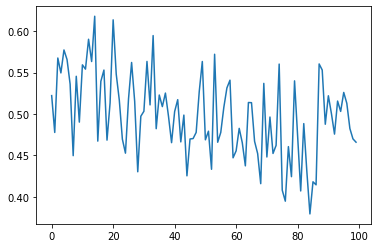

In [105]:
#Plotting the loss function
plt.plot(history.history['loss'])

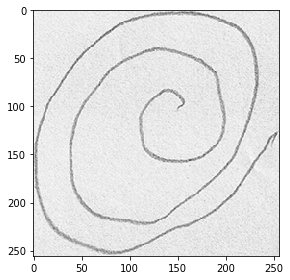

In [106]:
#Taking input for testing the Neural Network
X_test = np.zeros((30, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_test = np.zeros(30, dtype=np.uint8)
for i in range(1,16):
    im = imread('D:/Spandita/2_Final_Year_Project/DataSet/spiral/testing/parkinson/P ({}).png'.format(i))
    X_test[i-1,:,:,0] = im[:,:,0]
    Y_test[i-1] = 1
for i in range(1,16):
    im = imread('D:/Spandita/2_Final_Year_Project/DataSet/spiral/testing/healthy/H ({}).png'.format(i))
    X_test[i+15-1,:,:,0] = im[:,:,0]    
imshow(X_test[12,:,:,0])

In [107]:
#Shuffling the input array
shuffler = np.random.permutation(len(X_test))
X_test = X_test[shuffler]
Y_test = Y_test[shuffler]
X_test = X_test.astype("float32") / 255
#Y_test

In [108]:
#Augmenting Test DataSet
data_generator = ImageDataGenerator(
        rotation_range=20,
        horizontal_flip=True,
        width_shift_range=0.02,
        height_shift_range=0.02,
)
data_generator.fit(X_test)

In [109]:
#Testing the CNN
score = model.evaluate_generator(data_generator.flow(X_test, Y_test), verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

C:\Users\Spandita\AppData\Local\Temp\ipykernel_5692\2841751421.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(data_generator.flow(X_test, Y_test), verbose=0)


Test loss: 0.47088515758514404
Test accuracy: 0.8333333134651184


In [18]:
#redefine model to output right after the first hidden layer
#model_feature = Model(inputs=model.inputs, outputs=model.layers[1].output) 
#model_feature.summary() 
#img = X_train[0]

#expand dimensions so that it represents a single sample
#img = expand_dims(img, axis=0) 

#get feature map for first hidden layer
#feature_maps = model_feature.predict(img) 

# #plot all 64 maps in an 4x8 squares
# square = 8
# ix = 1
# for _ in range(square): 
#     for _ in range(square):
#         #specify subplot and turn of axis
#         ix = pyplot.subplot(square, square, ix)
#         ix.set_xticks([]) 
#         ix.set_yticks([])
#         # plot filter channel in grayscale
#         pyplot.imshow(feature_maps[0, :, :, ix-1], cmap="gray")
#         ix += 1

# #show the figure 
# pyplot.show()
#imshow(feature_maps[0,:,:,1])
#feature_maps.shape

In [17]:
from keras.applications.vgg16 import preprocess_input 
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

1/1 [==============================] - 0s 62ms/step


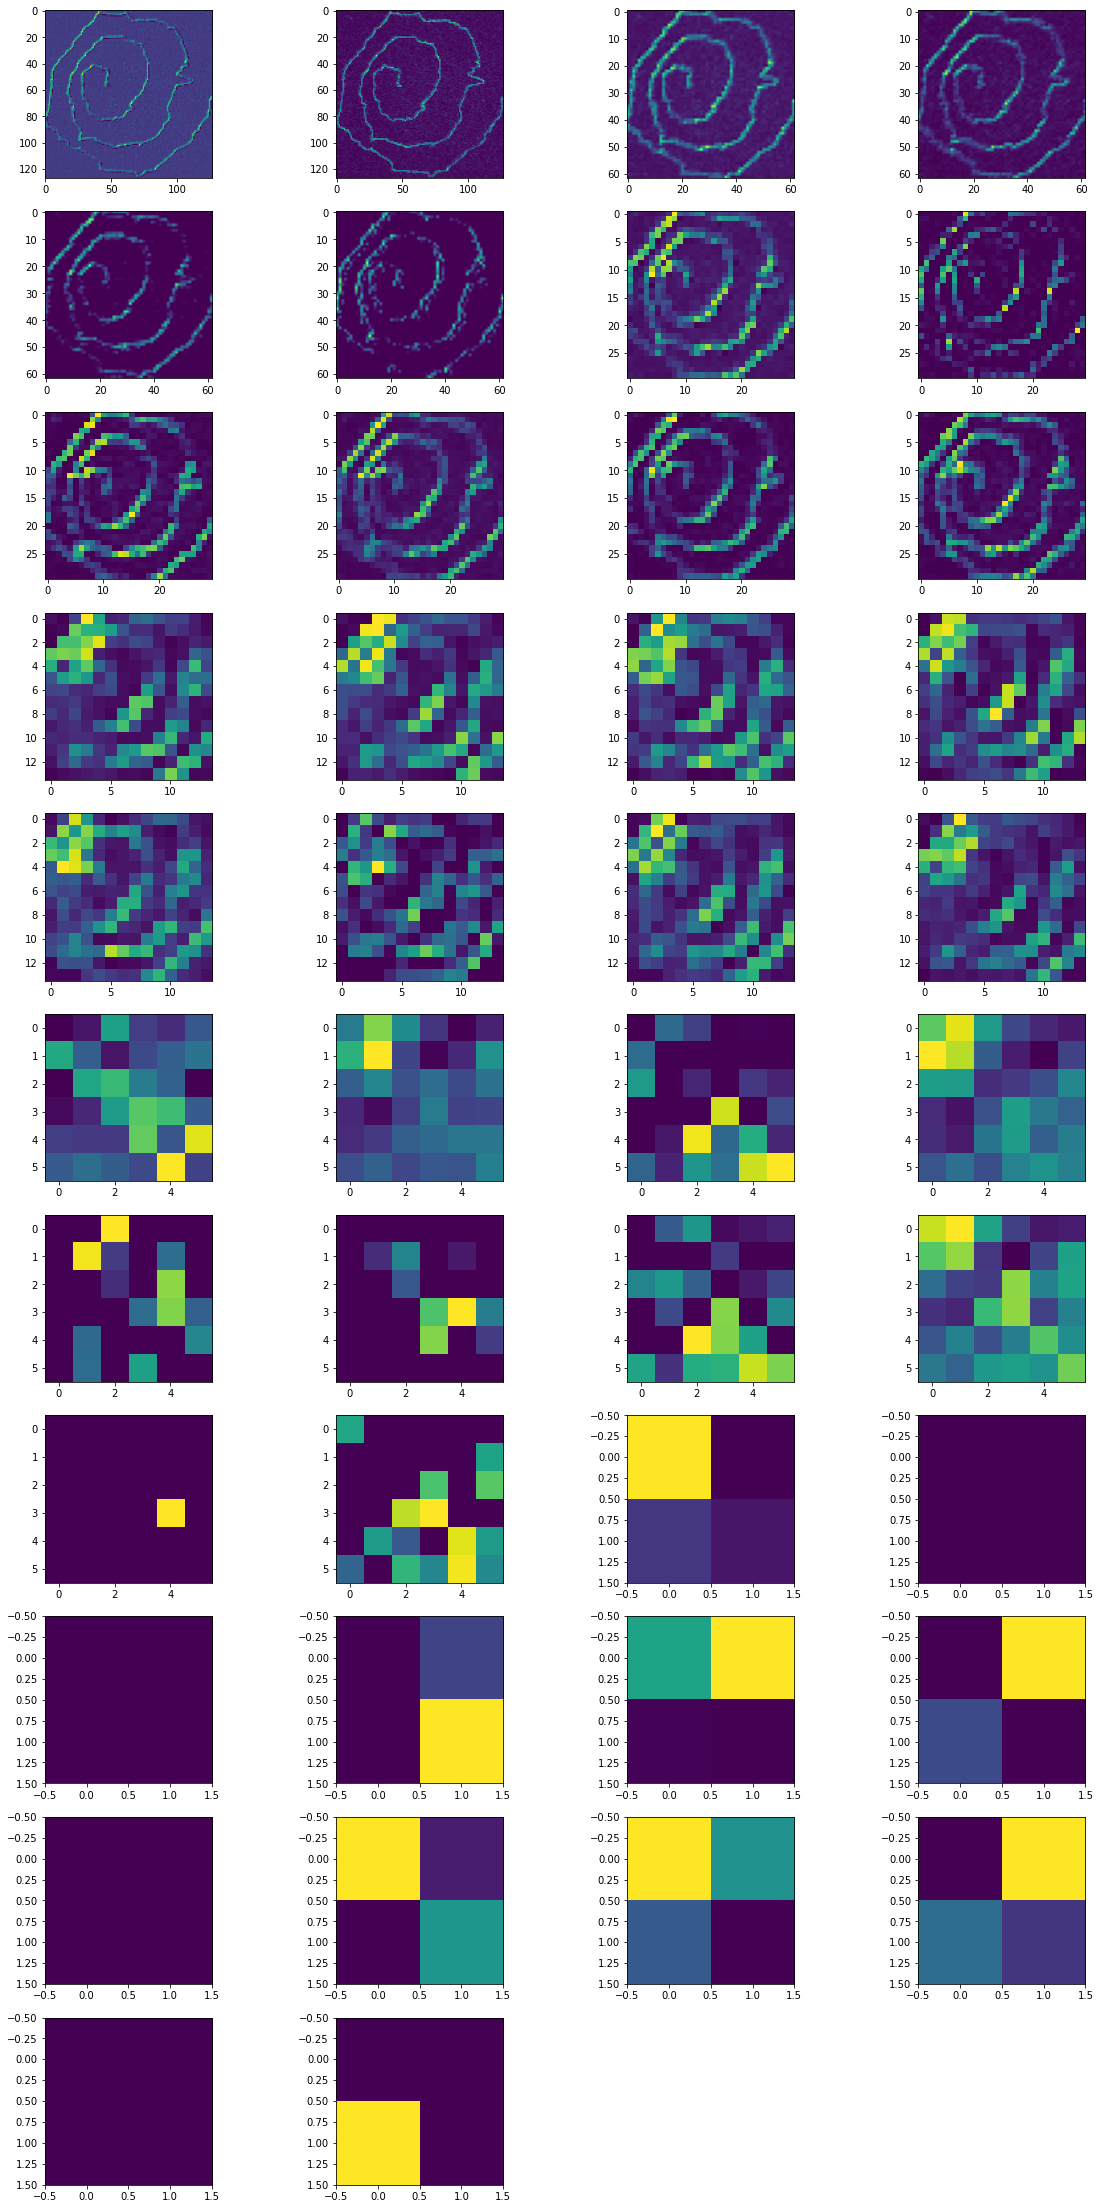

In [19]:
#Extracting feature maps for each image
img = X_test[2]
img = expand_dims(img, axis=0)
fig = plt.figure(figsize = (20,40))

plt_count = 1
filt_count = 2
for i in range(1,12,2):
    model_feature = Model(inputs=model.inputs, outputs=model.layers[i].output)
    feature_maps = model_feature.predict(img)
    for j in range(filt_count):          
        fig.add_subplot(11,4,plt_count)
        plt.imshow(feature_maps[0,:,:,j])
        plt_count += 1
    filt_count += 2    

plt.show()

In [308]:
print(Y_test[5])

1


In [162]:
y_pred = model.predict(X_test)
print(y_pred)
res = []
for y in y_pred:    
    if y < 0.5:
        res.append(0)
    else:
        res.append(1)
        
print(res)

1/1 [==============================] - 0s 104ms/step
[[0.8408198 ]
 [0.84219   ]
 [0.8706042 ]
 [0.04515924]
 [0.47730312]
 [0.9271891 ]
 [0.92256606]
 [0.7400683 ]
 [0.081442  ]
 [0.57429826]
 [0.35571015]
 [0.49818927]
 [0.8891356 ]
 [0.14727677]
 [0.6148965 ]
 [0.4492661 ]
 [0.23700246]
 [0.5825029 ]
 [0.43649042]
 [0.23112908]
 [0.7373268 ]
 [0.6589247 ]
 [0.16996065]
 [0.09223139]
 [0.9202916 ]
 [0.5574141 ]
 [0.5074189 ]
 [0.5768076 ]
 [0.9018036 ]
 [0.24678655]]
[1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0]


Parkinson Detected


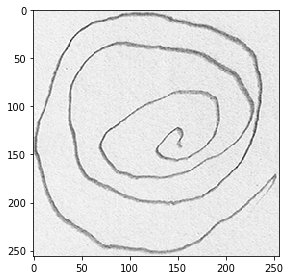

In [156]:
imshow(X_test[5,:,:,0])
if res[5] == 0:
    print("Healthy Person")
else:
    print("Parkinson Detected")

Healthy Person


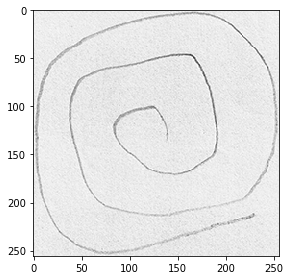

In [164]:
imshow(X_test[29,:,:,0])
if res[29] == 0:
    print("Healthy Person")
else:
    print("Parkinson Detected")

In [150]:
Y_test

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0], dtype=uint8)

In [133]:
#threshold = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 0.97]

#tp = 0
#tn = 0
#fp = 0
#fn = 0

#for t in threshold:
#    for i in range(len(y_pred)):
#        if Y_test[i] == 0 and y_pred[i][0] < t:
#            tn += 1
#        if Y_test[i] == 1 and y_pred[i][0] > t:
#            tp += 1
#        if Y_test[i] == 1 and y_pred[i][0] < t:
#            fp += 1
#        if Y_test[i] == 0 and y_pred[i][0] > t:
#            fn += 1
#    prec =  tp / (tp + fp)
#    rec = tp / (tp + fn)
#    accu = (tp+tn)* 100 / (tp + fp + tn + fn)   
#    print ('Thresh:%s, Accuracy:%s, Precision:%s, Recall:%s'%(t, accu, prec, rec))

In [124]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [167]:
#precision_score(Y_true, Y_pred)
act_pos = [1 for _ in range(15)]
act_neg = [0 for _ in range(15)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(13)] + [1 for _ in range(2)]
pred_neg = [1 for _ in range(6)] + [0 for _ in range(9)]
y_pred = pred_pos + pred_neg
#calculate prediction
precision = precision_score(y_true, y_pred, average='binary')
print('Precision: ', precision)

Precision:  0.25


In [168]:
from sklearn.metrics import recall_score
# define actual
act_pos = [1 for _ in range(15)]
act_neg = [0 for _ in range(15)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(2)] + [1 for _ in range(13)]
pred_neg = [0 for _ in range(15)]
y_pred = pred_pos + pred_neg
# calculate recall
recall = recall_score(y_true, y_pred, average='binary')
print('Recall: ', recall)

Recall:  0.8666666666666667


In [169]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(Y_test, y_pred)

print(cf_matrix)

[[10  5]
 [ 7  8]]


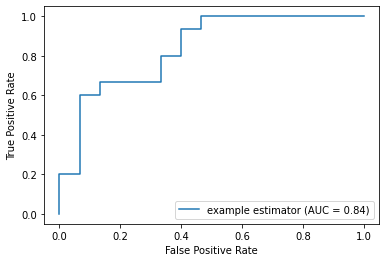

In [165]:
from sklearn import metrics
y=Y_test
pred=y_pred
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()